In [77]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [78]:
!dir german-traffic-signs

 Volume in drive C is Acer
 Volume Serial Number is 66B8-FF72

 Directory of c:\Users\Zharb\Documents\GitHub\multiclass-classification\AI\german-traffic-signs

11/10/2022  10:50 AM    <DIR>          .
11/10/2022  10:50 AM    <DIR>          ..
11/10/2022  10:50 AM             1,043 signnames.csv
11/10/2022  10:50 AM        38,888,118 test.p
11/10/2022  10:50 AM       107,146,452 train.p
11/10/2022  10:50 AM        13,578,712 valid.p
               4 File(s)    159,614,325 bytes
               2 Dir(s)  767,545,823,232 bytes free


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd

In [80]:
np.random.seed(0)  

In [81]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data=pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data=pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data=pickle.load(f)

print(type(train_data))

X_train, Y_train = train_data['features'], train_data['labels']

X_val, Y_val = val_data['features'], val_data['labels']

X_test, Y_test = test_data['features'], test_data['labels']


<class 'dict'>


In [82]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [83]:
assert(X_train.shape[0]==Y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0]==Y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0]==Y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:]==(32,32,3)), "The dimensions of the images are not 32,32,3"
assert(X_val.shape[1:]==(32,32,3)), "The dimensions of the images are not 32,32,3"
assert(X_test.shape[1:]==(32,32,3)), "The dimensions of the images are not 32,32,3"

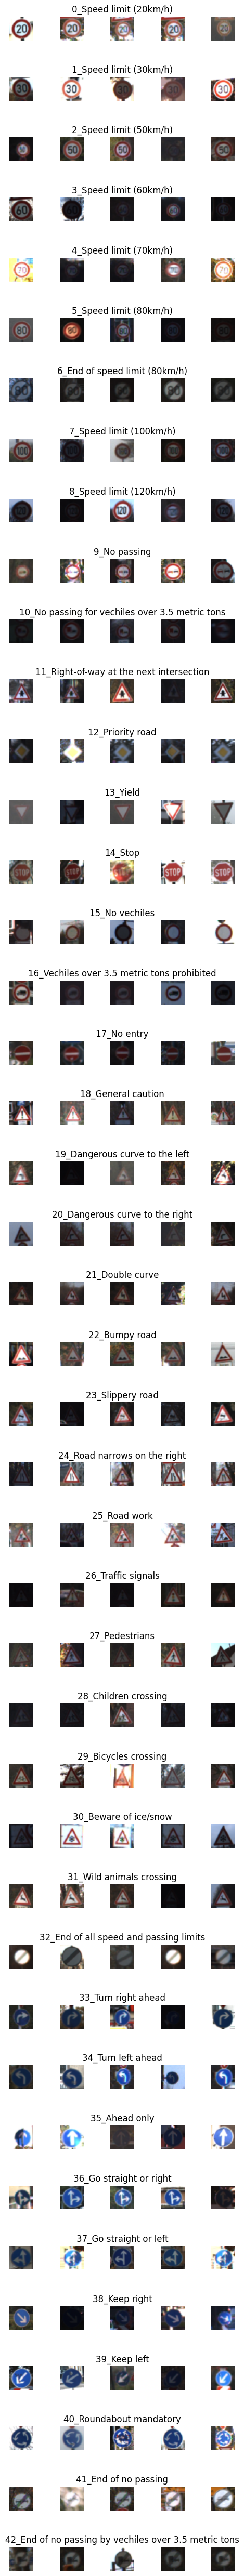

In [84]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[Y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["SignName"])
            num_of_samples.append(len(x_selected))

#(index, Series)




[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

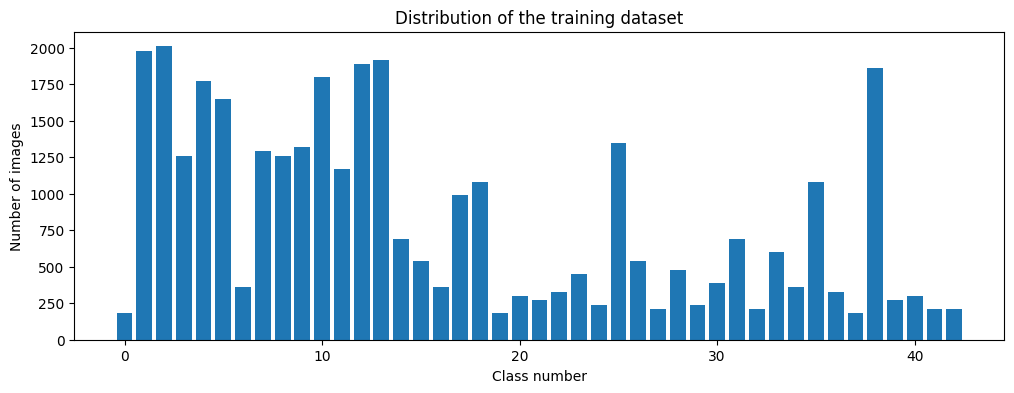

In [85]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


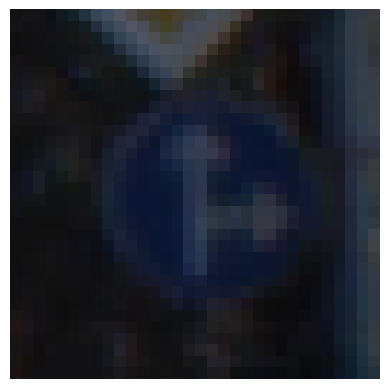

In [86]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(Y_train[1000])

(32, 32)


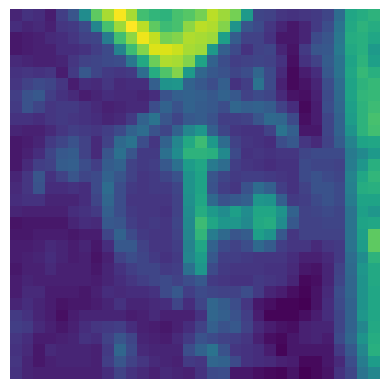

In [88]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


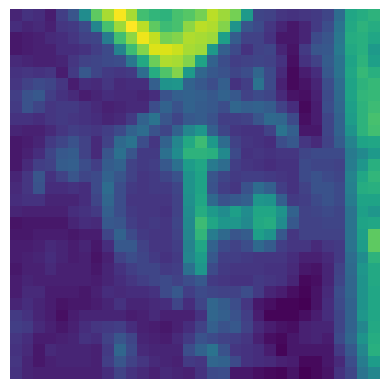

In [92]:
def equalize(img):
    cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [93]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


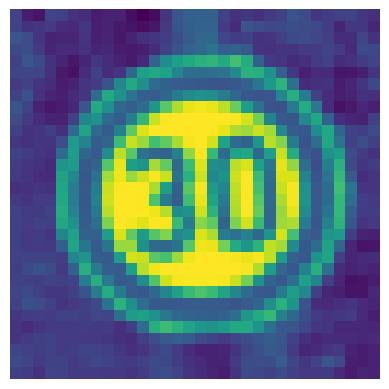

In [105]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [106]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [108]:
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
Y_val = to_categorical(Y_val, 43)